#**Coursera IBM Data Science Certification**
-------
##**Capstone Project - The Battle of Neighbourhoods**

`![alt text](https://skift.com/wp-content/uploads/2020/06/16200979678_cd1d005bd8_o-e1592061321356.jpg)
###**By Satyajeet Das**



#**This project will be divided into three parts:**
1.	Exploration of neighbourhood New York City
2.	Exploring Restaurants around New York City (Italian, Chinese and Indian)
3.	Exploring the ease of commute across New York City (Metros and Buses)


#**Data Section:**
##For this project uses the following data:
1. New York City data that contains list Boroughs, Neighbourhoods along with    their latitude and longitude.
   *   Data source : https://cocl.us/new_york_dataset
   *   Description: we will use this data set to explore various neighbourhoods of New York City



2. 	Venues in each neighbourhood of New York City.
   * Data source : Foursquare API
   * Description: By using this API we will get all the venues in each       neighbourhood. We can filter these venues to get Italian, Indian and Chinese restaurants as well as various transportation system the city offers (Metros and Buses).








3.	GeoSpace data
   * Data source : https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm
   * 	Description: By using this geo space data we will plot the NYC map with its neighbourhood, NYC map with neighbourhood grouped into clusters.


In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://cdn.vox-cdn.com/thumbor/_49exB-l_SrQ7IQlbALHZFMp0qY=/0x0:7185x4795/1200x900/filters:focal(3019x1824:4167x2972)/cdn.vox-cdn.com/uploads/chorus_image/image/62376513/shutterstock_1240270705.1542819552.jpg")

---
# **PART- 1 : EXPLORING NEW YORK CITY**
---

**Lets import some important libraries required**

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup
!pip install geocoder
import geocoder
import os
!pip install folium
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
print('done!!!!!')

     |████████████████████████████████| 102kB 2.7MB/s 
done!!!!!


Lets define a function gvenues which will collect all venues in the neighbourhood considering a radius of 750 meters.

In [ ]:
def gvenues(lat,lng):
    radius=750
    LIMIT=100



    CLIENT_ID ='L0IMG3LOP2R1HEFBBO4ORYI0THQLJGQARIKRS20ZFPUVDF55'
    CLIENT_SECRET ='P1NBRXDSJZTLCDTOWECJQOX35ADRREBZZZJJBXS4NB0WLJYN'
    VERSION = '20200711' 
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [ ]:
def g_NYCdata():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [ ]:
NYC_data= g_NYCdata()

In [ ]:
NYC_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [ ]:
NYC_data.shape

(306, 4)

The above code shows that are a total of 306 different Neighborhoods in New York.


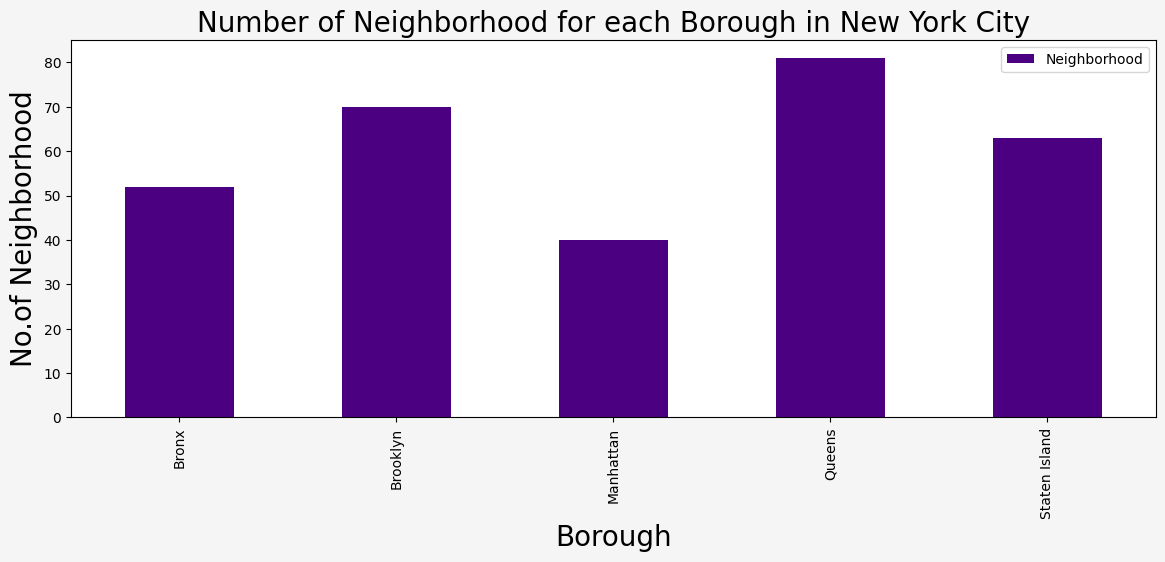

In [ ]:
plt.figure(figsize=(14,5), dpi = 100, facecolor='whitesmoke',edgecolor='b')
# title
plt.title('Number of Neighborhood for each Borough in New York City', fontsize = 20)
#On x-axis
plt.xlabel('Borough', fontsize = 20)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=20)
#giving a bar plot
NYC_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar',color='indigo')
#legend
plt.legend()
#displays the plot
plt.show()

**From the above Bar Plot, we can see that Queens has highest number of neighborhoods.**

In [ ]:

import geocoder
from geopy.geocoders import Nominatim 
address = '‎New York City'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [ ]:

import folium
print('Folium installed and imported!')

Folium installed and imported!


In [ ]:
import folium

map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)
for lat, lng, borough, neighborhood in zip(NYC_data['Latitude'], NYC_data['Longitude'], NYC_data['Borough'], NYC_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#87cefa',
        fill_opacity=0.5,
        parse_html=False).add_to(map_toronto)
map_toronto


**The above output shows the map of NYC with 306 neighbourhood marked**

## WE will be collecting the venues in 750 meters range 

In [ ]:

CLIENT_ID = 'ZIVYSLBFKLE2B5X5G40O4F1PQ12Z5ZY0QPVMJIYJHLVCAMVL'
CLIENT_SECRET = 'TGPRLM0BZZKM2U2TOEK4RBIMYI2QTRLKJ2R3KTVKRLH4NAPQ' 
VERSION = '20200711'
neighborhood_latitude = NYC_data.loc[0, 'Latitude']
neighborhood_longitude = NYC_data.loc[0, 'Longitude']
neighborhood_name = NYC_data.loc[0, 'Neighborhood']

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name,neighborhood_latitude,neighborhood_longitude))

LIMIT = 100
radius = 750
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,neighborhood_latitude,neighborhood_longitude,radius,LIMIT)
url

Latitude and longitude values of Wakefield are 40.89470517661, -73.84720052054902.


'https://api.foursquare.com/v2/venues/explore?&client_id=ZIVYSLBFKLE2B5X5G40O4F1PQ12Z5ZY0QPVMJIYJHLVCAMVL&client_secret=TGPRLM0BZZKM2U2TOEK4RBIMYI2QTRLKJ2R3KTVKRLH4NAPQ&v=20200711&ll=40.89470517661,-73.84720052054902&radius=750&limit=100'

In [ ]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f0a9ea5da803b65d25bc030'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4c537892fd2ea593cb077a28-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/dessert_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d1d0941735',
         'name': 'Dessert Shop',
         'pluralName': 'Dessert Shops',
         'primary': True,
         'shortName': 'Desserts'}],
       'id': '4c537892fd2ea593cb077a28',
       'location': {'address': '4120 Baychester Ave',
        'cc': 'US',
        'city': 'Bronx',
        'country': 'United States',
        'crossStreet': 'Edenwald & Bussing Ave',
        'distance': 127,
        'formattedAddress': ['4120 Baychester Ave (Edenwald & Bussing Ave)',
         'Bronx, NY 10466',
         'United 

In [ ]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
import json
from pandas.io.json import json_normalize

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,name,categories,lat,lng
0,Lollipops Gelato,Dessert Shop,40.894123,-73.845892
1,Carvel Ice Cream,Ice Cream Shop,40.890487,-73.848568
2,Jackie's West Indian Bakery,Caribbean Restaurant,40.889283,-73.843310
3,Walgreens,Pharmacy,40.896528,-73.844700
4,Rite Aid,Pharmacy,40.889062,-73.842993


## the venues from all neighbourhoods in NYC

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=750):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,lat,lng,radius,LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:

NYC_venues = getNearbyVenues(names=NYC_data['Neighborhood'],latitudes=NYC_data['Latitude'],longitudes=NYC_data['Longitude'])

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [ ]:
NYC_venues.head()

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
2,Wakefield,40.894705,-73.847201,Jackie's West Indian Bakery,40.889283,-73.843310,Caribbean Restaurant
3,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
4,Wakefield,40.894705,-73.847201,Rite Aid,40.889062,-73.842993,Pharmacy


In [ ]:
NYC_venues.shape

(15598, 7)

**We found 15598 venues in the neighbourhood of NYC**

## how many venues there are for each neighbourhood? lets cheack that?

In [ ]:
NYC_venues.groupby('Neighbourhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Allerton,44,44,44,44,44,44
Annadale,14,14,14,14,14,14
Arden Heights,10,10,10,10,10,10
Arlington,11,11,11,11,11,11
Arrochar,31,31,31,31,31,31
Arverne,29,29,29,29,29,29
Astoria,100,100,100,100,100,100
Astoria Heights,32,32,32,32,32,32
Auburndale,65,65,65,65,65,65


In [ ]:
print('There are {} uniques categories.'.format(len(NYC_venues['Venue Category'].unique())))

There are 458 uniques categories.


In [ ]:
NYC_venues['Venue Category'].unique()

array(['Dessert Shop', 'Ice Cream Shop', 'Caribbean Restaurant',
       'Pharmacy', 'Donut Shop', 'Gas Station', 'Sandwich Place',
       'Supermarket', 'Fried Chicken Joint', 'Deli / Bodega',
       'Pizza Place', 'Fast Food Restaurant', 'Bakery', 'Food Truck',
       'Gift Shop', 'Bagel Shop', 'Dumpling Restaurant',
       'Spanish Restaurant', 'Discount Store', 'Seafood Restaurant',
       'Mexican Restaurant', 'Post Office', 'Shopping Mall',
       'Mobile Phone Shop', 'Department Store', 'Grocery Store',
       'Convenience Store', 'Mattress Store',
       'Paper / Office Supplies Store', 'Restaurant', 'Bus Station',
       'Chinese Restaurant', 'Hotel', 'Basketball Court', "Men's Store",
       'Baseball Field', 'Park', 'Harbor / Marina', 'Accessories Store',
       'Electronics Store', 'Laundromat', 'Music Venue',
       'Other Great Outdoors', 'Print Shop', 'Diner',
       'Furniture / Home Store', 'Historic Site', 'Burger Joint',
       'Bowling Alley', 'Breakfast Spot', 'Cock

**The above output shows the various types of venues present in different neighbourhood of NYC.**

## Lets categorise them!!!

In [ ]:
NYC_onehot = pd.get_dummies(NYC_venues[['Venue Category']], prefix="", prefix_sep="")
NYC_onehot['Neighbourhood'] = NYC_venues['Neighbourhood'] 
fixed_columns = [NYC_onehot.columns[-1]] + list(NYC_onehot.columns[:-1])
NYC_onehot = NYC_onehot[fixed_columns]
NYC_grouped = NYC_onehot.groupby('Neighbourhood').mean().reset_index()
NYC_grouped.head()

,Neighbourhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Car Wash,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Basketball Court,College Bookstore,College Cafeteria,College Gym,College Stadium,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cruise,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Medical Supply Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Mountain,Mov

## Now lets find the top 15 most common venues for each neighbourhood

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
import numpy as np
num_top_venues = 15

indicators = ['st', 'nd', 'rd']

columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = NYC_grouped['Neighbourhood']

for ind in np.arange(NYC_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(NYC_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Allerton,Pizza Place,Donut Shop,Sandwich Place,Supermarket,Bar,Pharmacy,Fast Food Restaurant,Discount Store,Fried Chicken Joint,Mobile Phone Shop,Bike Trail,Clothing Store,Mexican Restaurant,Bus Station,Caribbean Restaurant
1,Annadale,Restaurant,Pizza Place,Sushi Restaurant,Diner,Liquor Store,Home Service,Park,Food,Train Station,American Restaurant,Cosmetics Shop,Deli / Bodega,Farmers Market,Financial or Legal Service,Fast Food Restaurant
2,Arden Heights,Spa,Food,Coffee Shop,Pizza Place,Liquor Store,Mexican Restaurant,Sandwich Place,Pharmacy,Bus Stop,Optical Shop,Flower Shop,Event Space,Exhibit,Factory,Falafel Restaurant
3,Arlington,Bus Stop,Deli / Bodega,Juice Bar,Coffee Shop,Construction & Landscaping,American Restaurant,Snack Place,Farmers Market,Farm,Fish Market,Fast Food Restaurant,Falafel Restaurant,Field,Filipino Restaurant,Film Studio
4,Arrochar,Baseball Field,Italian Restaurant,Liquor Store,Beach,Deli / Bodega,Bus Stop,Pizza Place,Sandwich Place,Sculpture Garden,Park,Outdoors & Recreation,Food Truck,Supermarket,Playground,Middle Eastern Restaurant


**The above table shows the most common venues in any Neighnourhood of NYC.**

## Now lets cluster neighbourhood using k-mean

In [ ]:
from sklearn.cluster import KMeans
kclusters = 5
NYC_grouped_clustering = NYC_grouped.drop('Neighbourhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(NYC_grouped_clustering)
kmeans.labels_[0:10]

array([3, 3, 3, 4, 4, 3, 0, 0, 0, 0], dtype=int32)

In [ ]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
NYC_merged = NYC_data
NYC_merged = NYC_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighborhood')
NYC_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,3,Supermarket,Pharmacy,Donut Shop,Gas Station,Ice Cream Shop,Fast Food Restaurant,Bakery,Bagel Shop,Caribbean Restaurant,Pizza Place,Gift Shop,Sandwich Place,Fried Chicken Joint,Deli / Bodega,Food Truck
1,Bronx,Co-op City,40.874294,-73.829939,3,Mattress Store,Pizza Place,Bus Station,Fast Food Restaurant,Accessories Store,Paper / Office Supplies Store,Grocery Store,Men's Store,Mexican Restaurant,Mobile Phone Shop,Fried Chicken Joint,Music Venue,Spanish Restaurant,Other Great Outdoors,Caribbean Restaurant
2,Bronx,Eastchester,40.887556,-73.827806,3,Caribbean Restaurant,Fast Food Restaurant,Diner,Pizza Place,Historic Site,Seafood Restaurant,Bakery,Shopping Mall,Grocery Store,Nightclub,Asian Restaurant,Bowling Alley,Sporting Goods Shop,Breakfast Spot,Furniture / Home Store
3,Bronx,Fieldston,40.895437,-73.905643,0,Bus Station,Park,Plaza,Athletics & Sports,River,Art Gallery,Coffee Shop,Playground,Pizza Place,Field,Filipino Restaurant,Zoo Exhibit,Film Studio,Farmers Market,Farm
4,Bronx,Riverdale,40.890834,-73.912585,0,Park,Diner,Japanese Restaurant,Bank,Bar,Plaza,Pizza Place,Mexican Restaurant,Bagel Shop,Burger Joint,Baseball Field,Medical Supply Store,Thai Restaurant,Greek Restaurant,Tapas Restaurant


LETS PLOT THE CLUSTERS IN MAP

In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.brg(np.linspace(0, 1, len(ys)))
brg = [colors.rgb2hex(i) for i in colors_array]

NYC_merged_x = NYC_merged.dropna(subset=['Cluster Labels'])

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NYC_merged_x['Latitude'], NYC_merged_x['Longitude'], NYC_merged_x['Neighborhood'], NYC_merged_x['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=brg[int(cluster-1)],
        fill=True,
        fill_color=brg[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

---
#**PART-2 : EXPLORING RESTURANTS AROUND NEW YORK CITY**
---
**WE WILL BE EXPLORING THREE DIFFERENT TYPES OF RESTURANTS PRESENT IN THE NEIIGHBOURHOOD OF NEW YORK CITY**
*  ITALIAN RESTURANT
*  CHINESE RESTURANT
*  INDIAN RESTURANT






---
###FIRSTLY, we will collect the data regarding **Italian** resturants present each Neighborhood. 







In [ ]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
italian_rest=pd.DataFrame(columns=column_names)
count=1
for row in NYC_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = gvenues(Latitude,Longitude)
    italian_resturants=venues[venues['Category']=='Italian Restaurant']   
    print('(',count,'/',len(NYC_data),')','Italian Restaurants in '+Neighborhood+', '+Borough+':'+str(len(italian_resturants)))
    for resturant_detail in italian_resturants.values.tolist():
        id, name , category=resturant_detail
        italian_rest = italian_rest.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Italian Restaurants in Wakefield, Bronx:0
( 2 / 306 ) Italian Restaurants in Co-op City, Bronx:0
( 3 / 306 ) Italian Restaurants in Eastchester, Bronx:0
( 4 / 306 ) Italian Restaurants in Fieldston, Bronx:0
( 5 / 306 ) Italian Restaurants in Riverdale, Bronx:1
( 6 / 306 ) Italian Restaurants in Kingsbridge, Bronx:0
( 7 / 306 ) Italian Restaurants in Marble Hill, Manhattan:0
( 8 / 306 ) Italian Restaurants in Woodlawn, Bronx:2
( 9 / 306 ) Italian Restaurants in Norwood, Bronx:0
( 10 / 306 ) Italian Restaurants in Williamsbridge, Bronx:0
( 11 / 306 ) Italian Restaurants in Baychester, Bronx:1
( 12 / 306 ) Italian Restaurants in Pelham Parkway, Bronx:2
( 13 / 306 ) Italian Restaurants in City Island, Bronx:2
( 14 / 306 ) Italian Restaurants in Bedford Park, Bronx:1
( 15 / 306 ) Italian Restaurants in University Heights, Bronx:0
( 16 / 306 ) Italian Restaurants in Morris Heights, Bronx:0
( 17 / 306 ) Italian Restaurants in Fordham, Bronx:0
( 18 / 306 ) Italian Restaurants in Ea

In [ ]:
italian_rest.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Riverdale,55aaee4d498e3cbb70e625d6,Bella Notte Pizzeria
1,Bronx,Woodlawn,511edb6de4b0d58346fd272d,Patrizia's Of Woodlawn
2,Bronx,Woodlawn,4d3cb3026b3d236a066a6364,Rivers Edge
3,Bronx,Baychester,5411894d498e4a254a11a46c,Olive Garden
4,Bronx,Pelham Parkway,4bf96ae65317a593d837017f,Enzo's


In [ ]:
italian_rest.shape

(429, 4)

**We found 429 Italian Resturants across New York City.**



---






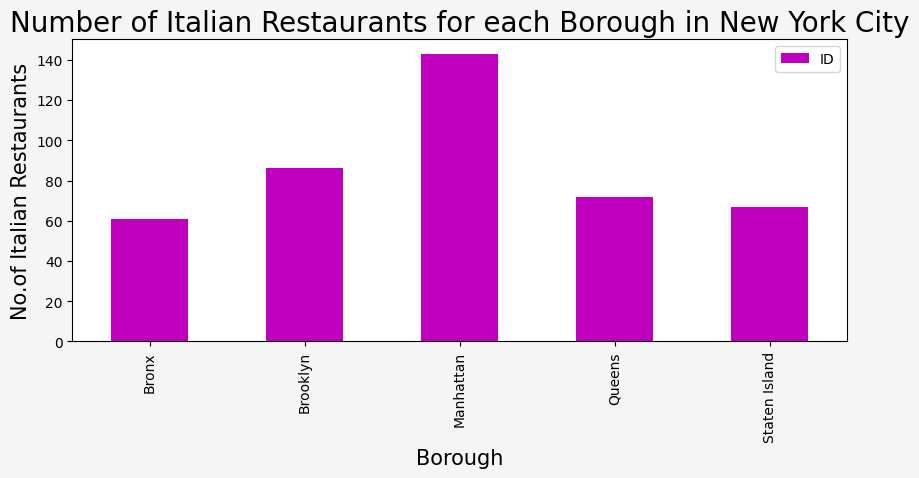

In [ ]:
plt.figure(figsize=(10,4), dpi = 100, facecolor='whitesmoke',edgecolor='b')
# title
plt.title('Number of Italian Restaurants for each Borough in New York City',fontsize = 20)
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Italian Restaurants', fontsize=15)
#giving a bar plot
italian_rest.groupby('Borough')['ID'].count().plot(kind='bar',color='m')
#legend
plt.legend()
#displays the plot
plt.show()

Manhattan has highest number of Italian resturants.

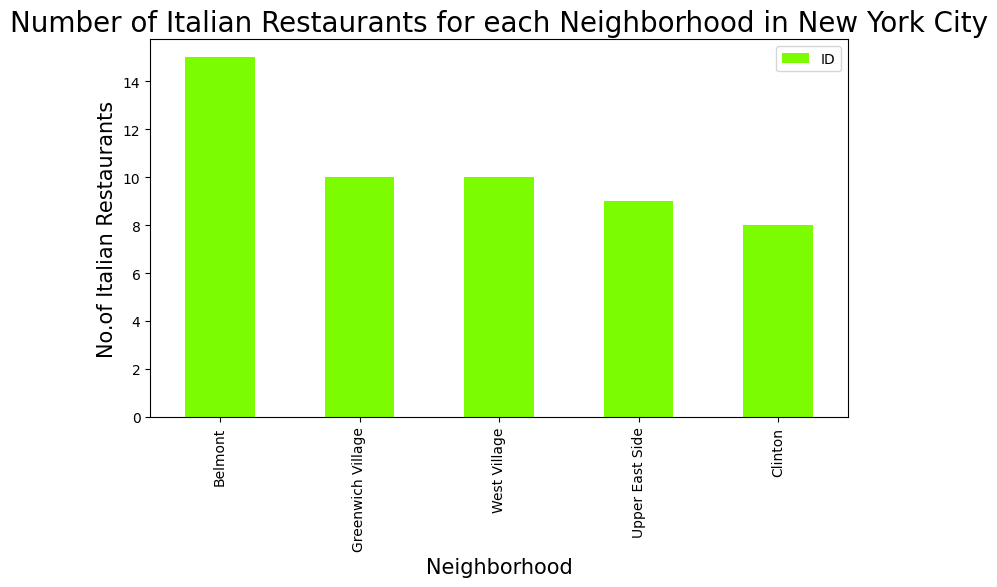

In [ ]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Italian Restaurants for each Neighborhood in New York City',fontsize = 20)
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Italian Restaurants', fontsize=15)
#giving a bar plot
italian_rest.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar', color='lawngreen')
#legend
plt.legend()
#displays the plot
plt.show()

In [ ]:
italian_rest[italian_rest['Neighborhood']=='Belmont']

,Borough,Neighborhood,ID,Name
25,Bronx,Belmont,4acf80aef964a52025d420e3,Tino's Delicatessen
26,Bronx,Belmont,4bb6470cef159c7465b275f7,Calabria Pork Store
27,Bronx,Belmont,59050f51b23dfa5f6649e678,Arthur Avenue Fiasco
28,Bronx,Belmont,4af0fa29f964a52060e021e3,Antonio's Trattoria
29,Bronx,Belmont,4aa425bef964a5208e4520e3,Dominick's Restaurant
30,Bronx,Belmont,4af71916f964a520cf0522e3,Michaelangelo's Coal Fired Brick Oven Pizza Re...
31,Bronx,Belmont,4b5514c4f964a5207cda27e3,Enzo's
32,Bronx,Belmont,4aa193d5f964a520124120e3,Mario's Restaurant & Catering
33,Bronx,Belmont,4c9b9e7b9c663704b90463fd,Gerbasi Ristorante
34,Bronx,Belmont,4b5a4c8ff964a52049bb28e3,Emilia's Restaurant


###We can see that, Belmont in Bronx has the highest number of Italian Restaurants with total of 15.


---
###NEXT, we will collect the data regarding **Chinese** restaurants present each Neighborhood. 


In [ ]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
chinese_rest=pd.DataFrame(columns=column_names)
count=1
for row in NYC_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = gvenues(Latitude,Longitude)
    chinese_resturants=venues[venues['Category']=='Chinese Restaurant']   
    print('(',count,'/',len(NYC_data),')','Chinese Restaurants in '+Neighborhood+', '+Borough+':'+str(len(chinese_resturants)))
    for resturant_detail in chinese_resturants.values.tolist():
        id, name , category=resturant_detail
        chinese_rest = chinese_rest.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Chinese Restaurants in Wakefield, Bronx:1
( 2 / 306 ) Chinese Restaurants in Co-op City, Bronx:1
( 3 / 306 ) Chinese Restaurants in Eastchester, Bronx:0
( 4 / 306 ) Chinese Restaurants in Fieldston, Bronx:0
( 5 / 306 ) Chinese Restaurants in Riverdale, Bronx:0
( 6 / 306 ) Chinese Restaurants in Kingsbridge, Bronx:0
( 7 / 306 ) Chinese Restaurants in Marble Hill, Manhattan:0
( 8 / 306 ) Chinese Restaurants in Woodlawn, Bronx:0
( 9 / 306 ) Chinese Restaurants in Norwood, Bronx:1
( 10 / 306 ) Chinese Restaurants in Williamsbridge, Bronx:1
( 11 / 306 ) Chinese Restaurants in Baychester, Bronx:2
( 12 / 306 ) Chinese Restaurants in Pelham Parkway, Bronx:2
( 13 / 306 ) Chinese Restaurants in City Island, Bronx:0
( 14 / 306 ) Chinese Restaurants in Bedford Park, Bronx:5
( 15 / 306 ) Chinese Restaurants in University Heights, Bronx:0
( 16 / 306 ) Chinese Restaurants in Morris Heights, Bronx:0
( 17 / 306 ) Chinese Restaurants in Fordham, Bronx:2
( 18 / 306 ) Chinese Restaurants in Ea

In [ ]:
chinese_rest.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Wakefield,4edbac4e775bcc53fc0ed5f8,Hong Kong China King
1,Bronx,Co-op City,4fee4857e4b0f9bd2b5cd611,Chinese Buffet (All You Can Eat)
2,Bronx,Norwood,4ce313fc438b224bbc6c80a3,Happy Dragon
3,Bronx,Williamsbridge,4e4df7a6bd4101d0d79f46dd,Golden China
4,Bronx,Baychester,4cd1dfb17b6854812887c9f8,No. 1 Chinese Restaurant


In [ ]:
chinese_rest.shape

(345, 4)

**We found 345 Chinese Restaurants across New York City.**


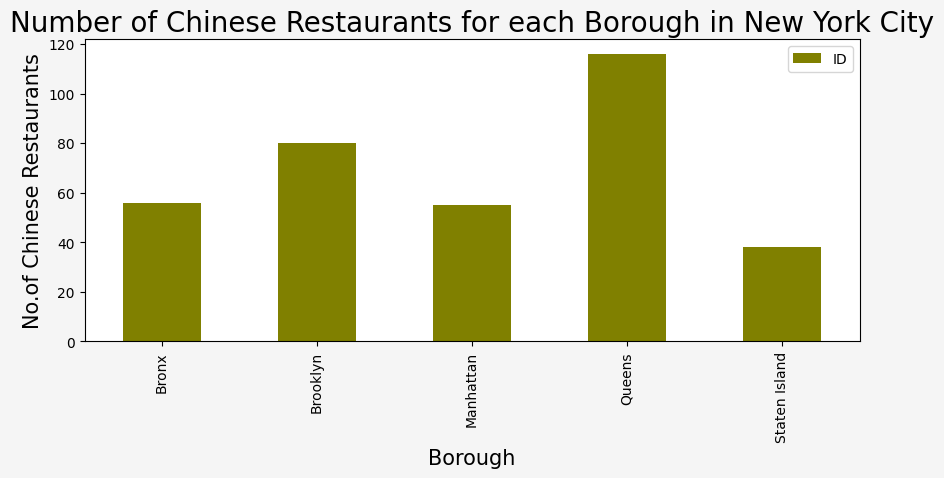

In [ ]:
plt.figure(figsize=(10,4), dpi = 100, facecolor='whitesmoke',edgecolor='b')
# title
plt.title('Number of Chinese Restaurants for each Borough in New York City',fontsize = 20)
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Chinese Restaurants', fontsize=15)
#giving a bar plot
chinese_rest.groupby('Borough')['ID'].count().plot(kind='bar',color='olive')
#legend
plt.legend()
#displays the plot
plt.show()

Queens has highest number of Chinese resturants.

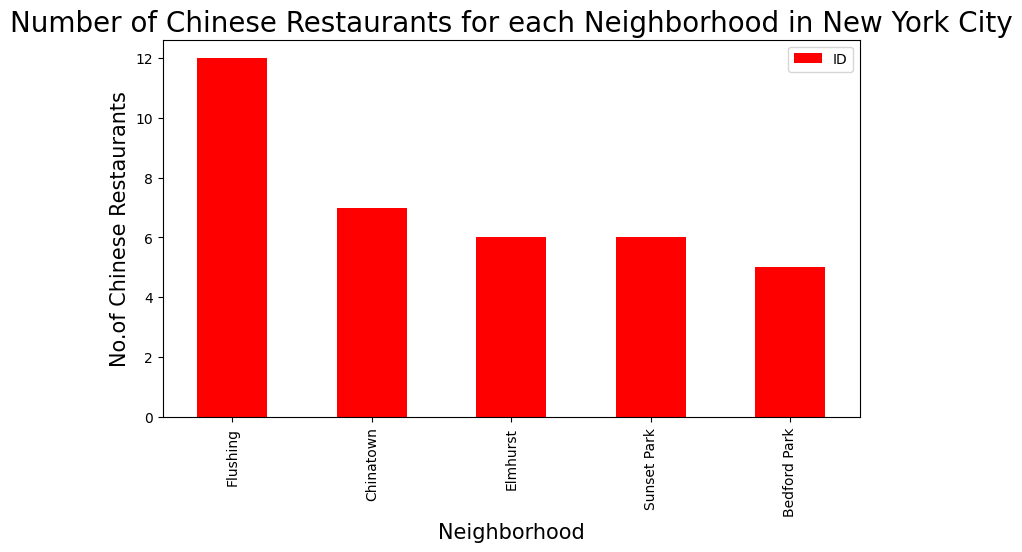

In [ ]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Chinese Restaurants for each Neighborhood in New York City',fontsize = 20)
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Chinese Restaurants', fontsize=15)
#giving a bar plot
chinese_rest.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar', color='r')
#legend
plt.legend()
#displays the plot
plt.show()

In [ ]:
chinese_rest[chinese_rest['Neighborhood']=='Flushing']


,Borough,Neighborhood,ID,Name
170,Queens,Flushing,5747a89b498ee4b7a5106556,DunHuang Lanzhou Beef Noodle
171,Queens,Flushing,4fa3f81be4b0a34ac673bf1e,Taipei Hong 台北夯
172,Queens,Flushing,52235ea211d2fe55782d764c,Dong Yi Feng
173,Queens,Flushing,4abfef82f964a520179320e3,New Imperial Palace 東湖
174,Queens,Flushing,4ad50f59f964a520950121e3,Fu Run 賦潤東北美食
175,Queens,Flushing,4c78756397028cfaec16d8fe,New Golden Szechuan Chinese Restaurant
176,Queens,Flushing,4faff7eae4b03b8055801cde,Xi'an Famous Foods
177,Queens,Flushing,4ef37491d3e32dc398c7c5c7,Laoma Mala Tang
178,Queens,Flushing,59bb19bebcbf7a6bb69bf937,Guan Fu Szechuan 官府川菜
179,Queens,Flushing,5990ab0a826444188d18dabc,Szechuan House


###We can see that, Flushing in Queens has the highest number of Chinese Restaurants  with total of 12.






---
###FINALLY, we will collect the data regarding **Indian** Restaurants  present each Neighborhood. 

In [ ]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest=pd.DataFrame(columns=column_names)
count=1
for row in NYC_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = gvenues(Latitude,Longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(NYC_data),')','Indian Restaurants in '+Neighborhood+', '+Borough+':'+str(len(indian_resturants)))
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        indian_rest = indian_rest.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Indian Restaurants in Wakefield, Bronx:0
( 2 / 306 ) Indian Restaurants in Co-op City, Bronx:0
( 3 / 306 ) Indian Restaurants in Eastchester, Bronx:0
( 4 / 306 ) Indian Restaurants in Fieldston, Bronx:0
( 5 / 306 ) Indian Restaurants in Riverdale, Bronx:0
( 6 / 306 ) Indian Restaurants in Kingsbridge, Bronx:0
( 7 / 306 ) Indian Restaurants in Marble Hill, Manhattan:0
( 8 / 306 ) Indian Restaurants in Woodlawn, Bronx:1
( 9 / 306 ) Indian Restaurants in Norwood, Bronx:0
( 10 / 306 ) Indian Restaurants in Williamsbridge, Bronx:0
( 11 / 306 ) Indian Restaurants in Baychester, Bronx:0
( 12 / 306 ) Indian Restaurants in Pelham Parkway, Bronx:0
( 13 / 306 ) Indian Restaurants in City Island, Bronx:0
( 14 / 306 ) Indian Restaurants in Bedford Park, Bronx:0
( 15 / 306 ) Indian Restaurants in University Heights, Bronx:0
( 16 / 306 ) Indian Restaurants in Morris Heights, Bronx:0
( 17 / 306 ) Indian Restaurants in Fordham, Bronx:0
( 18 / 306 ) Indian Restaurants in East Tremont, Bronx:

In [ ]:
indian_rest.head()


,Borough,Neighborhood,ID,Name
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot
1,Bronx,Williamsbridge,570c3a3fcd10eecd0d0434cd,Agra Grill
2,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill
3,Bronx,Concourse,551b7f75498e86c00a0ed2e1,Hungry Bird
4,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill


In [ ]:
indian_rest.shape

(103, 4)

**We found 103 Indian Resturants across New York City.**


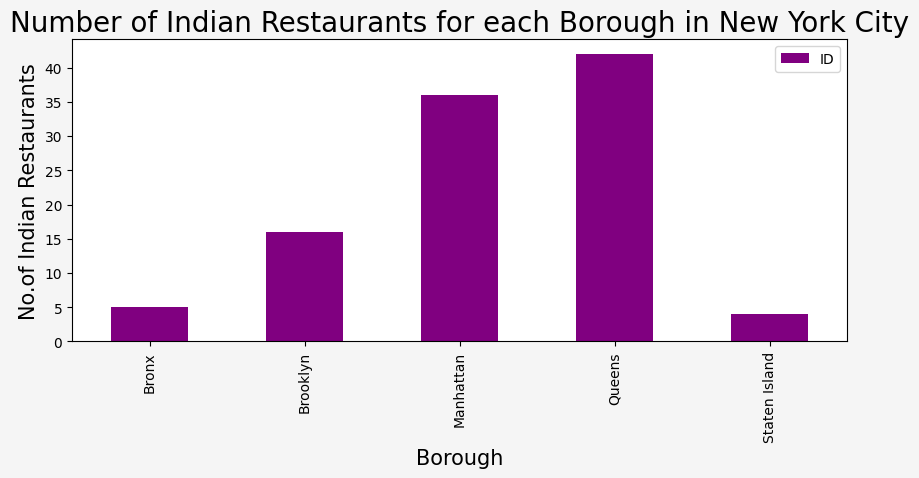

In [ ]:
plt.figure(figsize=(10,4), dpi = 100, facecolor='whitesmoke',edgecolor='b')
# title
plt.title('Number of Indian Restaurants for each Borough in New York City',fontsize = 20)
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Restaurants', fontsize=15)
#giving a bar plot
indian_rest.groupby('Borough')['ID'].count().plot(kind='bar',color='purple')
#legend
plt.legend()
#displays the plot
plt.show()

Queens has highest number of Indian Resturants.

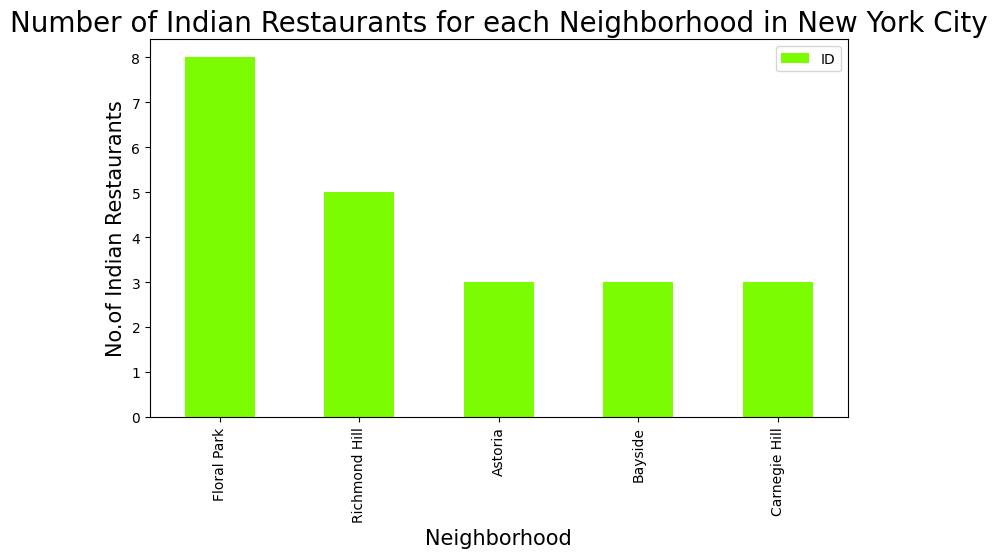

In [ ]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Restaurants for each Neighborhood in New York City',fontsize = 20)
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Restaurants', fontsize=15)
#giving a bar plot
indian_rest.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar', color='lawngreen')
#legend
plt.legend()
#displays the plot
plt.show()

In [ ]:
indian_rest[indian_rest['Neighborhood']=='Floral Park']

,Borough,Neighborhood,ID,Name
69,Queens,Floral Park,527ffc0811d2d329d5e49abd,Jackson Diner
70,Queens,Floral Park,4e4e3e22bd4101d0d7a5c2d1,Kerala Kitchen
71,Queens,Floral Park,4b647b56f964a520c4b62ae3,Usha Foods & Usha Sweets
72,Queens,Floral Park,4b787c49f964a5209cd12ee3,Santoor Indian Restaurant
73,Queens,Floral Park,4c0c01e0bbc676b00d6b4cd5,Mumbai Xpress
74,Queens,Floral Park,4c76ff35a5676dcb72671721,Flavor Of India
75,Queens,Floral Park,4ec1b54f4690d2338a359d66,Tabaq Kebab Grill
76,Queens,Floral Park,4c3e17f2ca012d7f82022fbe,Mushin's Halal Food [Gyro Cart]


###We can see that, Floral Park in Queens has the highest number of Indian Restaurants with total of 8.


--------
--------
# **PART-3 : EXPLORING THE EASE OF COMMUTE IN NYC** 
--------
##Here we will be analysing the ease of commute across NYC in a simple way.We are assuming the peson will use public transport.
##We will analyse the number of **Bus Stops** and **Metro Stations** in the neighbourhood of NYC. 

##The case of cabs is excluded as their service can be acquired in even remote location. But the fact that they are about three to four times costlier as compared to metros and buses, leads us to believe that a normal person will prefer a metro or bus compared to taxi. Its a inherent tendency of human to save money. And for daily commute buses and metros far too economical compared to their counterpart taxis. Who likes a spendthridt, right!! Nobody will be willing to pay more if other economical and convinient methods are available.

------
## **We will start with Bus Stop**

In [ ]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
Bus_stop=pd.DataFrame(columns=column_names)
count=1
for row in NYC_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = gvenues(Latitude,Longitude)
    busstops= venues[venues['Category']=='Bus Stop']
    print('(',count,'/',len(NYC_data),')','Bus stops in '+Neighborhood+', '+Borough+':'+str(len(busstops)))
    for resturant_detail in busstops.values.tolist():
        id, name , category=resturant_detail
        Bus_stop = Bus_stop.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Bus stops in Wakefield, Bronx:0
( 2 / 306 ) Bus stops in Co-op City, Bronx:0
( 3 / 306 ) Bus stops in Eastchester, Bronx:0
( 4 / 306 ) Bus stops in Fieldston, Bronx:0
( 5 / 306 ) Bus stops in Riverdale, Bronx:0
( 6 / 306 ) Bus stops in Kingsbridge, Bronx:1
( 7 / 306 ) Bus stops in Marble Hill, Manhattan:0
( 8 / 306 ) Bus stops in Woodlawn, Bronx:0
( 9 / 306 ) Bus stops in Norwood, Bronx:0
( 10 / 306 ) Bus stops in Williamsbridge, Bronx:0
( 11 / 306 ) Bus stops in Baychester, Bronx:0
( 12 / 306 ) Bus stops in Pelham Parkway, Bronx:0
( 13 / 306 ) Bus stops in City Island, Bronx:0
( 14 / 306 ) Bus stops in Bedford Park, Bronx:0
( 15 / 306 ) Bus stops in University Heights, Bronx:0
( 16 / 306 ) Bus stops in Morris Heights, Bronx:0
( 17 / 306 ) Bus stops in Fordham, Bronx:0
( 18 / 306 ) Bus stops in East Tremont, Bronx:1
( 19 / 306 ) Bus stops in West Farms, Bronx:0
( 20 / 306 ) Bus stops in High  Bridge, Bronx:0
( 21 / 306 ) Bus stops in Melrose, Bronx:0
( 22 / 306 ) Bus stops 

In [ ]:
Bus_stop.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Kingsbridge,4cb1f98ab4b0a35d9c1056ce,Mta Bx1 Sedgwick (Ft. Independence
1,Bronx,East Tremont,4cc0c1a3f82ebfb7f2b56f91,MTA Bus - E Tremont Av & Southern Bl (Bx40/Bx42)
2,Bronx,Hunts Point,58c6fde9b210145bd26f50eb,MTA New York City Bus - Bx6/Bx46 @ Opposite 15...
3,Bronx,Clason Point,4e59bf443151520d8063248d,MTA New York City Bus - Bx27/Bx39 @ Clason Point
4,Bronx,Clason Point,4e43c359fa76eeb2daba8411,Bx 39 Bus Stop O Brien Ave


In [ ]:
Bus_stop.shape

(120, 4)

There are a total of 120 bustops in the neighbourhood of NYC.

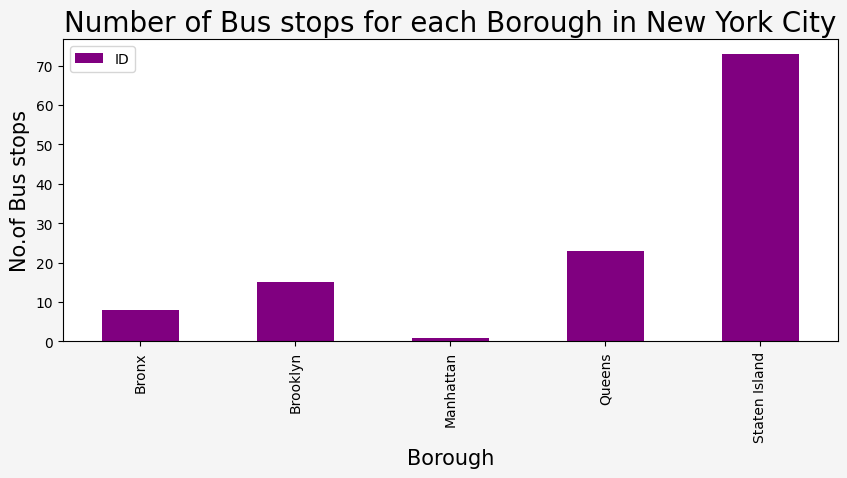

In [ ]:
plt.figure(figsize=(10,4), dpi = 100, facecolor='whitesmoke',edgecolor='b')
# title
plt.title('Number of Bus stops for each Borough in New York City',fontsize = 20)
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Bus stops', fontsize=15)
#giving a bar plot
Bus_stop.groupby('Borough')['ID'].count().plot(kind='bar',color='purple')
#legend
plt.legend()
#displays the plot
plt.show()

**So, Staten Island has the largest number of bus stop.**

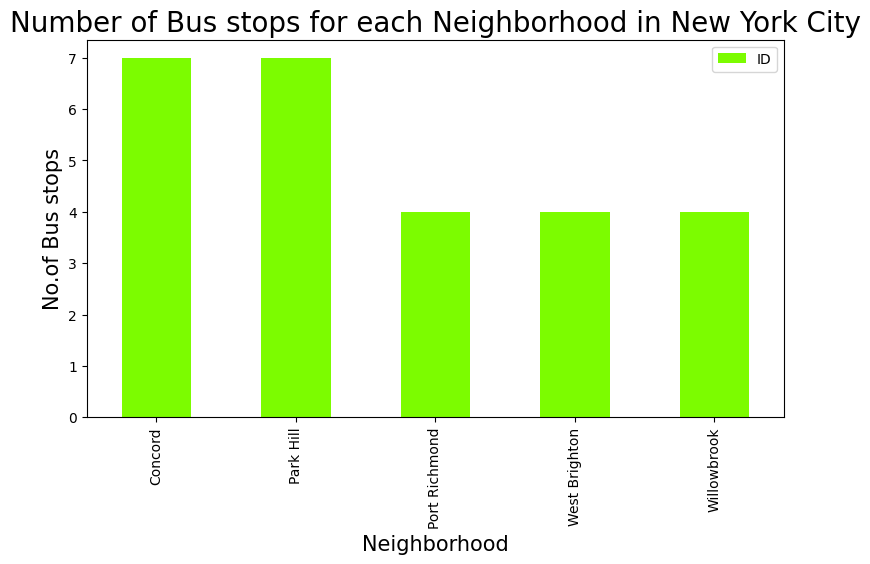

In [ ]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Bus stops for each Neighborhood in New York City',fontsize = 20)
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Bus stops', fontsize=15)
#giving a bar plot
Bus_stop.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar', color='lawngreen')
#legend
plt.legend()
#displays the plot
plt.show()

In [ ]:
Bus_stop[Bus_stop['Neighborhood']=='Concord']

,Borough,Neighborhood,ID,Name
96,Staten Island,Concord,4c927c43ec2376b0c67d2202,MTA Bus - Clove Rd & Grasmere Station (S53)
97,Staten Island,Concord,4c0b09927e3fc928a5c3f482,MTA Bus - Clove Rd & Targee St (S53/S74/S76/S7...
98,Staten Island,Concord,4db086d9f7b1bd003acace89,MTA Bus - Hylan Bl & Narrows Rd S (S78/S79-SBS...
99,Staten Island,Concord,4e3fb7b062e19d61098b3aa3,MTA Bus - Hylan Bl & Narrows Rd S (S78/S79-SBS...
100,Staten Island,Concord,4de068f2b0fbe2cfa6069813,MTA Bus - Hylan Bl & Clove Rd (S53/S78/S79-SBS...
101,Staten Island,Concord,4e5eea37e4cdfc603ee2759b,MTA Bus - Richmond Rd & Narrows Rd South (S74/...
102,Staten Island,Concord,4e558bd845dd0a4826e7fbfc,MTA Bus - Narrows Rd N & St Johns Av (S79-SBS/...


In [ ]:
Bus_stop[Bus_stop['Neighborhood']=='Park Hill']

,Borough,Neighborhood,ID,Name
61,Staten Island,Park Hill,4e558bd845dd0a4826e7fbfc,MTA Bus - Narrows Rd N & St Johns Av (S79-SBS/...
62,Staten Island,Park Hill,4db1a99c43a1bea42bd0fa36,MTA Bus - Hylan Bl & Reynolds St (S78)
63,Staten Island,Park Hill,4e3fb7b062e19d61098b3aa3,MTA Bus - Hylan Bl & Narrows Rd S (S78/S79-SBS...
64,Staten Island,Park Hill,4db086d9f7b1bd003acace89,MTA Bus - Hylan Bl & Narrows Rd S (S78/S79-SBS...
65,Staten Island,Park Hill,4c927c43ec2376b0c67d2202,MTA Bus - Clove Rd & Grasmere Station (S53)
66,Staten Island,Park Hill,4d1a46a7401db60c94ab00a5,MTA Bus - Targee St & Vanderbilt Av (S74/S76)
67,Staten Island,Park Hill,4cea6e0ef8653704bab3bcc4,MTA Bus - Hylan Bl & Vaughn St (S78)


So, Concord and Park Hill neighbourhood of Staten Island has highest number of Bus stop.

##**Finally, Lets analyse the Metro Stations**

In [ ]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
Metro_Station=pd.DataFrame(columns=column_names)
count=1
for row in NYC_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = gvenues(Latitude,Longitude)
    MetroStation= venues[venues['Category']=='Metro Station']
    print('('count,'/',len(NYC_data),')','Metro Stations in '+Neighborhood+', '+Borough+':'+str(len(MetroStation)))
    for resturant_detail in MetroStation.values.tolist():
        id, name , category=resturant_detail
        Metro_Station = Metro_Station.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)

( 1 / 306 ) Metro Stations in Wakefield, Bronx:0
( 1 / 306 ) Metro Stations in Co-op City, Bronx:0
( 1 / 306 ) Metro Stations in Eastchester, Bronx:0
( 1 / 306 ) Metro Stations in Fieldston, Bronx:0
( 1 / 306 ) Metro Stations in Riverdale, Bronx:0
( 1 / 306 ) Metro Stations in Kingsbridge, Bronx:1
( 1 / 306 ) Metro Stations in Marble Hill, Manhattan:0
( 1 / 306 ) Metro Stations in Woodlawn, Bronx:0
( 1 / 306 ) Metro Stations in Norwood, Bronx:1
( 1 / 306 ) Metro Stations in Williamsbridge, Bronx:1
( 1 / 306 ) Metro Stations in Baychester, Bronx:0
( 1 / 306 ) Metro Stations in Pelham Parkway, Bronx:2
( 1 / 306 ) Metro Stations in City Island, Bronx:0
( 1 / 306 ) Metro Stations in Bedford Park, Bronx:0
( 1 / 306 ) Metro Stations in University Heights, Bronx:0
( 1 / 306 ) Metro Stations in Morris Heights, Bronx:0
( 1 / 306 ) Metro Stations in Fordham, Bronx:0
( 1 / 306 ) Metro Stations in East Tremont, Bronx:1
( 1 / 306 ) Metro Stations in West Farms, Bronx:0
( 1 / 306 ) Metro Stations in

In [ ]:
Metro_Station.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Kingsbridge,4af2d730f964a520b3e821e3,MTA Subway - 238th St (1)
1,Bronx,Norwood,4b4c2b57f964a52029af26e3,MTA Subway - Mosholu Parkway (4)
2,Bronx,Williamsbridge,4b8ca10bf964a520c5d832e3,MTA Subway - 219th St (2/5)
3,Bronx,Pelham Parkway,4eeaa4ed77c8730d38061384,MTA Subway - Pelham Parkway (5)
4,Bronx,Pelham Parkway,4b74a9d0f964a52013eb2de3,MTA Subway - Morris Park (5)


In [ ]:
Metro_Station.shape

(27, 4)

So there are 27 metro stations in the neighbourhood of NYC.

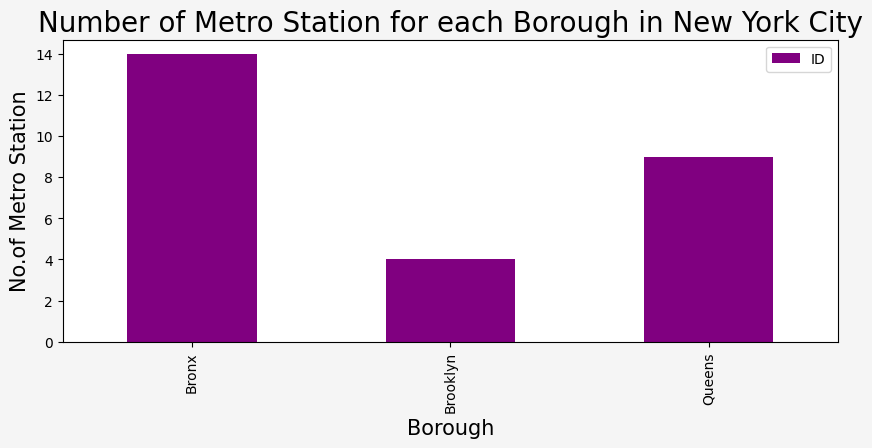

In [ ]:
plt.figure(figsize=(10,4), dpi = 100, facecolor='whitesmoke',edgecolor='b')
# title
plt.title('Number of Metro Station for each Borough in New York City',fontsize = 20)
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Metro Station', fontsize=15)
#giving a bar plot
Metro_Station.groupby('Borough')['ID'].count().plot(kind='bar',color='purple')
#legend
plt.legend()
#displays the plot
plt.show()

As the results shows Bronx has the highest number of Metro Stations.

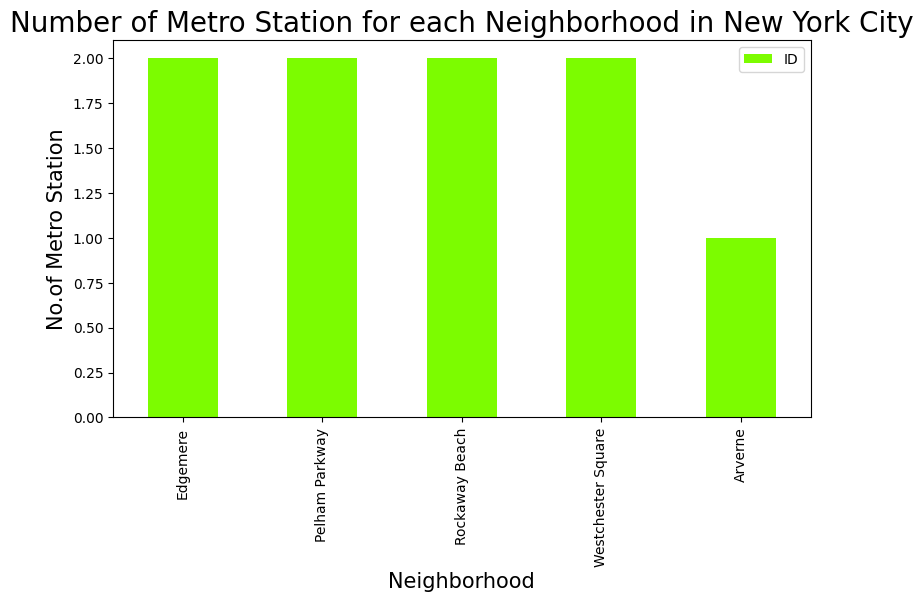

In [ ]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Metro Station for each Neighborhood in New York City',fontsize = 20)
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Metro Station', fontsize=15)
#giving a bar plot
Metro_Station.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar', color='lawngreen')
#legend
plt.legend()
#displays the plot
plt.show()

So, as the graphs shows-four neighbourhoods Edgemere, Pelham Parkway Rockaway Beach and Westchester Square, have 2 metro station each.

----------

#THANK YOU FOR YOUR TIME !!!!

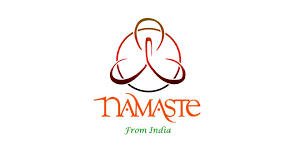

------------------------------------------
--------------------------------------------
--------------------------------------------